### Data Pre-Processing

The original apple quality dataset was downloaded as a csv file from Kaggle, and required pre-processing to better fit our task of building a predictive model, that classifies apples as good or bad based on their measures of features of size and taste. After reading in the csv file, the apple ID column was dropped, as it is not necessary for our model and analysis. The dataset was searched for rows with missing values, and those rows were dropped. Finally, the column "Quality" was converted from containing categorical values of "good" and "bad" to classify apples, to binary numerical values of 0 and 1, as numerical measures would be more accessible in creating a correlation matrix, for instance.

In [27]:
import csv
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/laksha/Downloads/R files/STA141c/submission/apple_quality.csv'
with open(file_path, mode='r') as file:
    csv_reader = csv.reader(file)
    df = pd.read_csv(file_path)
    # dropping apple ID column - not necessary for our model
    df = df.drop(columns=['A_id'])
    # dropping rows with missing values
    df = df.dropna()
    # converting categorial "good" or "bad" to 0 and 1
    df['Quality'] = df['Quality'].map({'good':1, 'bad':0})
    print(df)




          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity  Quality  
0     -0.491590483        1  
1     -0.722809367        1  
2      2.621636473        0  
3  

### Exploratory Data Analysis 
Below is a correlation matrix, visualizing the relationships between each feature of apples with all other features and apple quality. This provides insight into whether some features might have a greater effect on apple quality, or if there is presence of multicollinearity.

<Axes: >

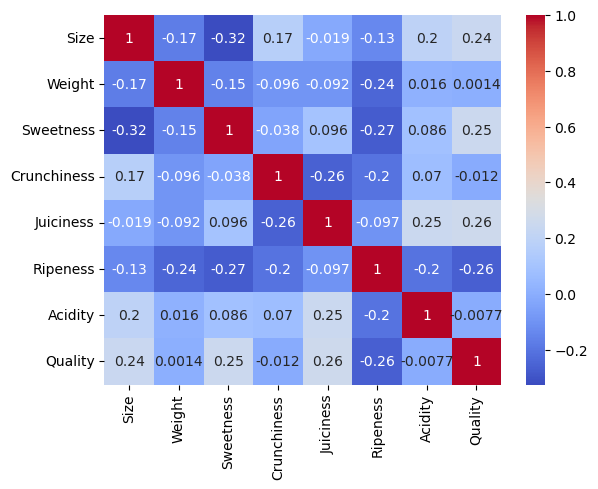

In [29]:
# correlation matrix
corr_matrix = df.corr()
# heatmap to visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The correlation matrix shows that there is generally a low correlation between all features, with neither feature having a significantly strong correlation with apple quality as well. Further analysis, utilizing logistic regression, will indicate if any features (size, weight, sweetness, crunchiness, juiciness, ripeness, acidity) are not statisticially significant in regards to apple quality, and need to be dropped. Dropping such features will allow for more accurate predictions.